<a href="https://colab.research.google.com/github/ronee12/Computer-Vision-Deep-learning-Work-Shop/blob/master/Reuters_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import reuters
(x_train_data,y_train_data),(x_test_data,y_test_data) = reuters.load_data(num_words=10000)

In [30]:
x_train_data.shape

(8982,)

In [31]:
y_train_data.shape

(8982,)

In [0]:
import numpy as np

def vectorize(sequence,dimension=10000):
  results = np.zeros((len(sequence),dimension), dtype='float32')
  for i,sq in enumerate(sequence):
    results[i,sq] = 1
  return results

In [0]:
x_train = vectorize(x_train_data)
x_test = vectorize(x_test_data)

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train_data)
y_test = to_categorical(y_test_data) 

In [35]:
print("X_train shape {}".format(x_train.shape))
print("y_train shape {}".format(y_train.shape))
print("X_test shape {}".format(x_test.shape))
print("y_test shape {}".format(y_test.shape))

X_train shape (8982, 10000)
y_train shape (8982, 46)
X_test shape (2246, 10000)
y_test shape (2246, 46)


In [36]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(10000,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
x_train = x_train[1000:]
y_val = y_train[:1000]
y_train = y_train[1000:]

In [39]:
history = model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 101us/step - loss: 3.3031 - accuracy: 0.4226 - val_loss: 2.4821 - val_accuracy: 0.5420
Epoch 2/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.9651 - accuracy: 0.5952 - val_loss: 1.5888 - val_accuracy: 0.6410
Epoch 3/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.3420 - accuracy: 0.7131 - val_loss: 1.2925 - val_accuracy: 0.7110
Epoch 4/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.0443 - accuracy: 0.7770 - val_loss: 1.1345 - val_accuracy: 0.7550
Epoch 5/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.8336 - accuracy: 0.8225 - val_loss: 1.0456 - val_accuracy: 0.7790
Epoch 6/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.6641 - accuracy: 0.8530 - val_loss: 0.9855 - val_accuracy: 0.7960
Epoch 7/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.52

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

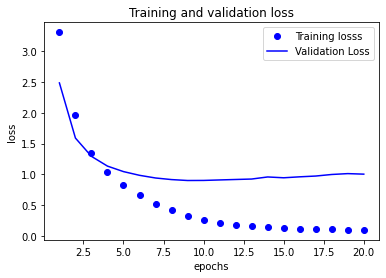

In [42]:
import matplotlib.pyplot as plt
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label = 'Training losss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel("epochs")
plt.ylabel('loss')
plt.legend()
plt.show()

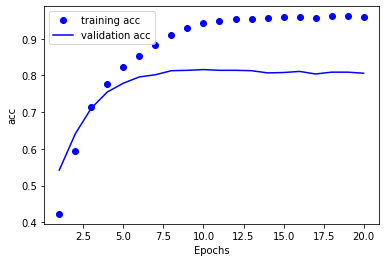

In [45]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,(len(acc)+1))

plt.plot(epochs,acc,'bo',label = 'training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()